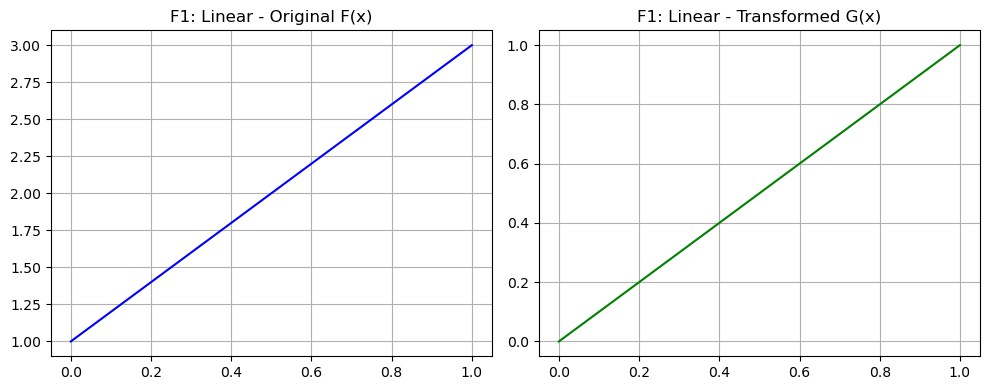

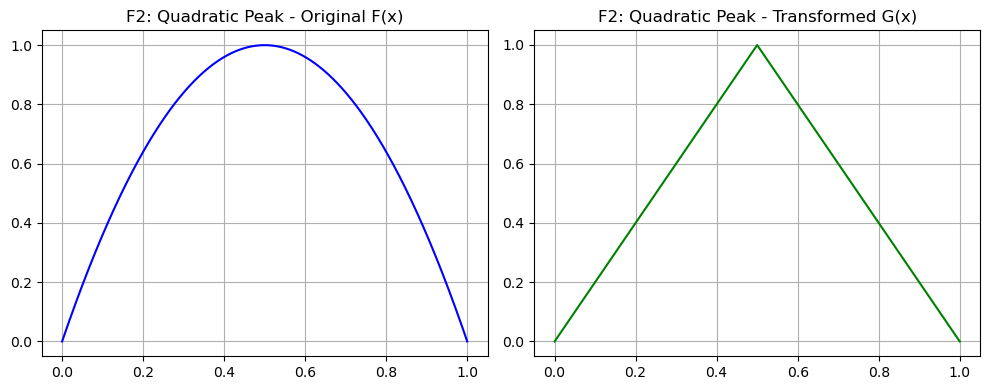

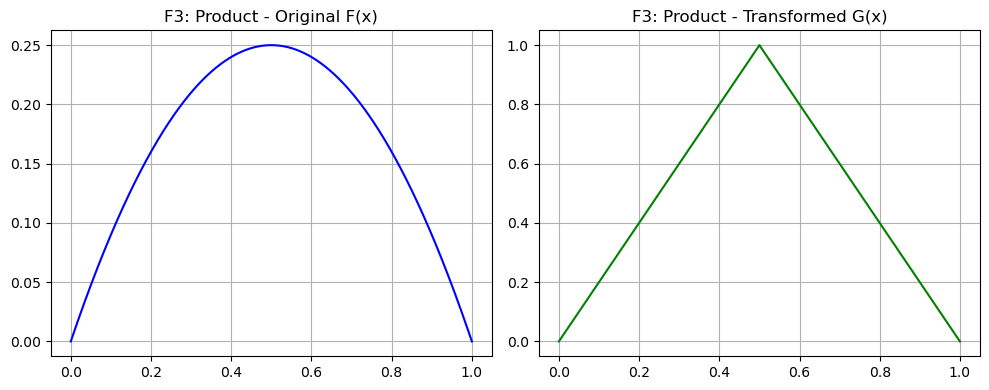

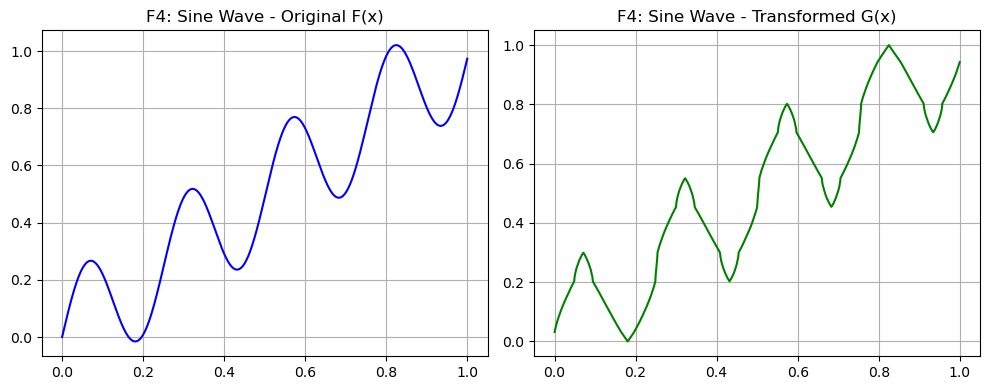

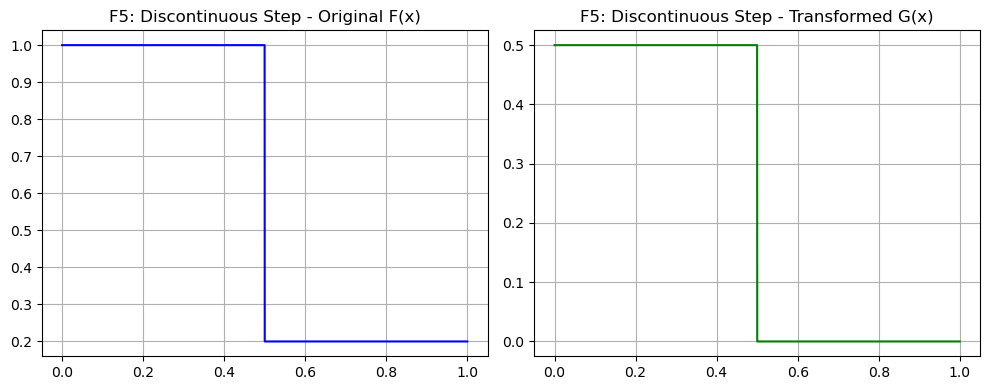

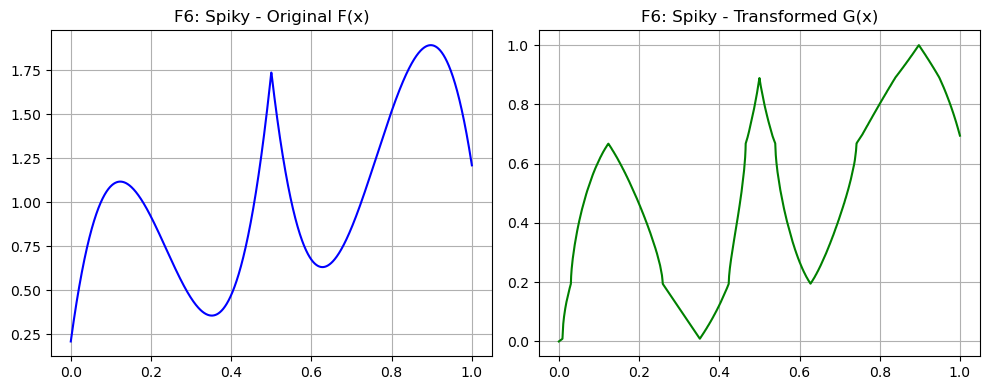

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def T(F, n=1000):
    """
    Transforms a function F to a new function G such that:
    G(x) = proportion of t in [0,1] for which F(t) < F(x)
    Approximate by evaluating F at n evenly spaced points in [0,1]
    """
    xs = np.linspace(0, 1, n)
    fx_values = np.array([F(x) for x in xs])
    
    def G(x):
        fx = F(x)
        return np.mean(fx_values < fx)
    
    return G

# Example Functions

def linear_monotone(x):  # Linear: increasing
    return 2 * x + 1

def quadratic_peak(x):  # Quadratic: peak in the middle
    return -4 * (x - 0.5)**2 + 1

def product(x):  # Product function
    return x * (1 - x)

def wavy(x):  # Negative values
    return 0.2*np.sin(25 * x)+x  # range [-1, 1]

def discountinuous(x):  # Discontinuous function
    return 1 if x < 0.5 else 0.2

def spiky(x):
    def smooth(x):
        return 3*(x**2) -2 * (x**3)

    return smooth(4*abs(0.5-x)-0.55) + x

# Plotting utilities

def plot_transformation(F, title, n=1000):
    G = T(F, n=n)
    xs = np.linspace(0, 1, n)
    f_vals = np.array([F(x) for x in xs])
    g_vals = np.array([G(x) for x in xs])
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(xs, f_vals, label='F(x)', color='blue')
    plt.title(f'{title} - Original F(x)')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(xs, g_vals, label='G(x)', color='green')
    plt.title(f'{title} - Transformed G(x)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Apply to example functions
example_functions = [
    (linear_monotone, "F1: Linear"),
    (quadratic_peak, "F2: Quadratic Peak"),
    (product, "F3: Product"),
    (wavy, "F4: Sine Wave"),
    (discountinuous, "F5: Discontinuous Step"),
    (spiky, "F6: Spiky")
]

for func, name in example_functions:
    plot_transformation(func, name, n=3000)
